In [1]:
import eda
import cleaning

[nltk_data] Downloading package stopwords to /home/lea/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/lea/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/lea/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import operator

from sklearn.decomposition import NMF

In [3]:
df = cleaning.clean_files_directory('text')

In [5]:
common_words, words_across_articles = eda.get_common_words(df)

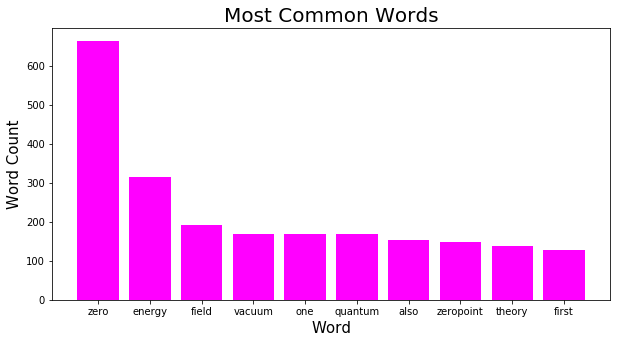

In [6]:
def most_common_words(df):
    word_dict = dict(common_words[0:10])

    names = list(word_dict.keys())
    values = list(word_dict.values())

    fig, ax = plt.subplots(figsize= (10, 5)) #13706 unique words
    ax.bar(range(len(word_dict)), values, tick_label=names, color='magenta')
    ax.set_title('Most Common Words', fontsize=20 )
    ax.set_xlabel('Word', fontsize=15)
    ax.set_ylabel('Word Count', fontsize=15)

most_common_words(common_words)

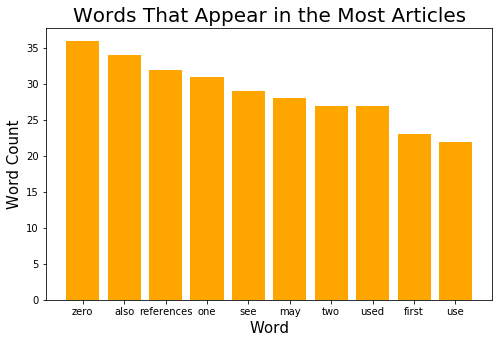

In [10]:
def words_articles(words_across_articles):
    words_article = dict(words_across_articles[0:10])

    article_names = list(words_article.keys())
    article_values = list(words_article.values())

    fig, ax = plt.subplots(figsize= (8, 5)) #13706 unique words
    ax.bar(range(len(words_article)), article_values, tick_label=article_names, color='orange')
    ax.set_title('Words That Appear in the Most Articles', fontsize=20 )
    ax.set_xlabel('Word', fontsize=15)
    ax.set_ylabel('Word Count', fontsize=15)
    
words_articles(words_across_articles)   

In [7]:
eda.word_count(df)
#13706 unique words

45625

In [16]:
eda.join_strings(df)

In [17]:
#eda.vectorize(df)

In [18]:
#eda.get_concepts(df)

In [17]:
smallest, biggest = eda.get_idfs(df)

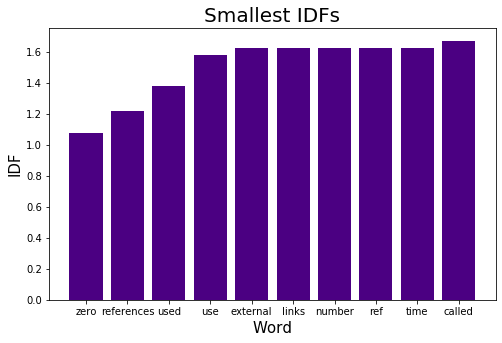

In [18]:
def small_idf(df):
    smallest_idf = dict(smallest[0:10])

    idf_words = list(smallest_idf.keys())
    idf_values = list(smallest_idf.values())

    fig, ax = plt.subplots(figsize= (8, 5)) 
    ax.bar(range(len(smallest_idf)), idf_values, tick_label=idf_words, color='indigo')
    ax.set_title('Smallest IDFs', fontsize=20 )
    ax.set_xlabel('Word', fontsize=15)
    ax.set_ylabel('IDF', fontsize=15)
    
small_idf(smallest)

In [28]:
import pandas as pd
concept = eda.get_concepts(df)
pd.DataFrame(concept)

,0,1,2,3,4,5,6
0,sum,video,url,nominal,data,series,topological
1,signal,win,nasa,zero,package,film,theory
2,roots,sega,corporation,rates,install,mostel,quantum
3,matrix,strategy,space,human,management,season,space
4,divisor,zero,song,rate,computer,episode,vacuum
5,ring,players,company,monetary,cryptographic,enterprise,temperature
6,point,player,flight,policy,address,zero,thermal
7,voltage,zerosum,flights,economic,software,star,equilibrium
8,function,games,zero,population,page,trek,energy
9,zero,game,gravity,growth,memory,hour,law
